# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

---

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

## Section 1: Define and Describe the Dataset

### Dataset Description

The dataset consists of network traffic data entries, each representing a network communication session. It includes features like average inter-packet time, bytes in/out, source/destination IP addresses, ports, protocol, entropy, number of packets in/out, time duration, total entropy, and a label indicating the session's classification as malicious, benign, or an outlier.

### Reason for Choosing this Dataset

This dataset was selected for its relevance in network security analysis. Analyzing network traffic is vital for detecting anomalies and enhancing network security.

### Variables Used

- `avg_ipt`: Average inter-packet time
- `bytes_in`: Bytes in
- `bytes_out`: Bytes out
- `dest_ip`: Destination IP address
- `dest_port`: Destination port
- `entropy`: Entropy
- `num_pkts_out`: Number of packets out
- `num_pkts_in`: Number of packets in
- `proto`: Protocol
- `src_ip`: Source IP address
- `src_port`: Source port
- `time_end`: End time
- `time_start`: Start time
- `total_entropy`: Total entropy
- `label`: Label (malicious, benign, outlier)
- `duration`: Duration

### Analysis Planned

I am planning to perform 
- **descriptive analysis:** I'll start by exploring the distribution of key features such as bytes in/out, average inter-packet time, and entropy. This will help me understand the typical characteristics of network traffic in the dataset.

- **correlation analysis:** I'll examine the relationships between different features and the target variable (label) to identify significant correlations. This will provide insights into which features are most relevant for detecting malicious activities.

- **anomaly detectioncorrelation analysis:** Using machine learning techniques, I'll develop models to detect anomalies in network traffic. This involves identifying sessions that deviate significantly from normal behavior and may indicate potential security threats.

### Hypothesis

Malicious network traffic sessions will exhibit higher entropy and more irregular patterns in terms of inter-packet times compared to benign sessions.

### Next Steps

Let's proceed with importing the dataset, defining the schema, and conducting exploratory data analysis.


In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("NetworkDataAnalysis") \
    .getOrCreate()

file_path = "/FileStore/tables/2021_01_20.csv"  
df = spark.read.csv(file_path, header=True, inferSchema=True)

df.printSchema()




root
 |-- avg_ipt: double (nullable = true)
 |-- bytes_in: integer (nullable = true)
 |-- bytes_out: integer (nullable = true)
 |-- dest_ip: integer (nullable = true)
 |-- dest_port: integer (nullable = true)
 |-- entropy: double (nullable = true)
 |-- num_pkts_out: integer (nullable = true)
 |-- num_pkts_in: integer (nullable = true)
 |-- proto: integer (nullable = true)
 |-- src_ip: integer (nullable = true)
 |-- src_port: integer (nullable = true)
 |-- time_end: long (nullable = true)
 |-- time_start: long (nullable = true)
 |-- total_entropy: double (nullable = true)
 |-- label: string (nullable = true)
 |-- duration: double (nullable = true)



In [0]:

df.show(5)



+------------------+--------+---------+-------+---------+--------+------------+-----------+-----+------+--------+----------------+----------------+-------------+---------+---------+
|           avg_ipt|bytes_in|bytes_out|dest_ip|dest_port| entropy|num_pkts_out|num_pkts_in|proto|src_ip|src_port|        time_end|      time_start|total_entropy|    label| duration|
+------------------+--------+---------+-------+---------+--------+------------+-----------+-----+------+--------+----------------+----------------+-------------+---------+---------+
|            193.75|     270|      191|    786|      445|4.600684|           6|          6|    6|   786|   60548|1611103133422618|1611103132188772|    2120.9153|malicious| 1.233846|
|               5.0|      48|       48|    786|      123| 4.99962|           1|          1|   17|   786|     123|1611103133548769|1611103133538447|    479.96356|  outlier| 0.010322|
|             93.25|    1443|     1176|    786|       22|6.803977|          12|         14

In [0]:
df.select(["avg_ipt", "bytes_in", "bytes_out", "entropy", "duration"]).describe().show()


+-------+-------------------+------------------+------------------+-----------------+------------------+
|summary|            avg_ipt|          bytes_in|         bytes_out|          entropy|          duration|
+-------+-------------------+------------------+------------------+-----------------+------------------+
|  count|             364477|            364477|            364477|           364477|            364477|
|   mean|  4345206.131239907| 449.9441418800089|3741.6901258515627|2.864720561626792|1.2778318683620593|
| stddev|7.111880613776456E7|2025.8819887589552| 7710.095112411712|2.238229736721199|18.068249398296498|
|    min|                0.0|                 0|                 0|              0.0|               0.0|
|    max|      4.294967295E9|             64810|             65533|          52.5852|         10484.757|
+-------+-------------------+------------------+------------------+-----------------+------------------+



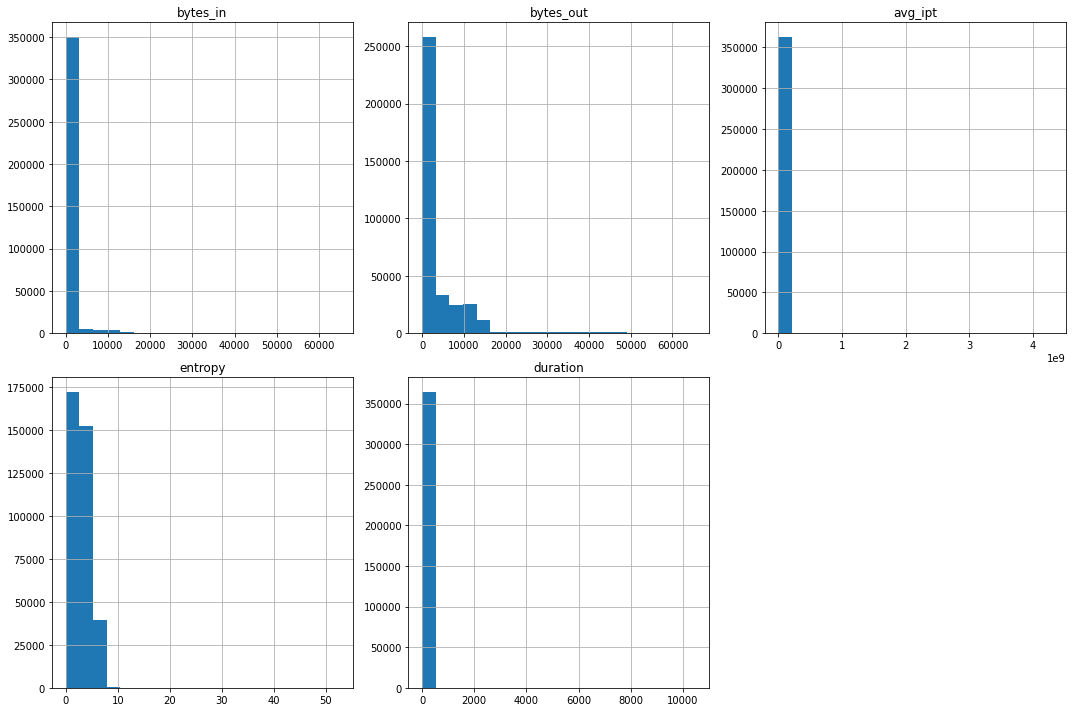

In [0]:
import matplotlib.pyplot as plt

hist_data = df.select("bytes_in", "bytes_out", "avg_ipt", "entropy", "duration").toPandas()

hist_data.hist(figsize=(15, 10), layout=(2, 3), bins=20)
plt.tight_layout()
plt.show()



Based on the hypothesis, the features that we should consider are those that are indicative of irregular or anomalous network behavior, such as:


**Features:**

1. **Entropy:** This feature measures the randomness or unpredictability of the data, which may be higher in malicious network traffic due to encryption or obfuscation.

2. **Average Inter-Packet Time (avg_ipt):** Irregular inter-packet times may indicate potential malicious activity, such as DDoS attacks or port scanning.

3. **Bytes In and Bytes Out:** Unusually large data transfers or data exfiltration attempts may be indicative of malicious behavior.

**Target Variable:**

The target variable is the label indicating whether a network traffic session is classified as malicious or benign. This label will be used to train the model to differentiate between the two types of network activity. Therefore, our target variable would be the `label` column in the dataset.


# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

In [0]:
from pyspark.sql.functions import col

for col_name in df.columns:
    null_count = df.where(col(col_name).isNull()).count()
    print(f"Null count in column '{col_name}': {null_count}")


Null count in column 'avg_ipt': 0
Null count in column 'bytes_in': 0
Null count in column 'bytes_out': 0
Null count in column 'dest_ip': 0
Null count in column 'dest_port': 31475
Null count in column 'entropy': 0
Null count in column 'num_pkts_out': 0
Null count in column 'num_pkts_in': 0
Null count in column 'proto': 0
Null count in column 'src_ip': 0
Null count in column 'src_port': 31475
Null count in column 'time_end': 0
Null count in column 'time_start': 0
Null count in column 'total_entropy': 0
Null count in column 'label': 0
Null count in column 'duration': 0


In [0]:
cleaned_df = df.dropna()
cleaned_df.show()

+------------------+--------+---------+-------+---------+--------+------------+-----------+-----+------+--------+----------------+----------------+-------------+---------+---------+
|           avg_ipt|bytes_in|bytes_out|dest_ip|dest_port| entropy|num_pkts_out|num_pkts_in|proto|src_ip|src_port|        time_end|      time_start|total_entropy|    label| duration|
+------------------+--------+---------+-------+---------+--------+------------+-----------+-----+------+--------+----------------+----------------+-------------+---------+---------+
|            193.75|     270|      191|    786|      445|4.600684|           6|          6|    6|   786|   60548|1611103133422618|1611103132188772|    2120.9153|malicious| 1.233846|
|               5.0|      48|       48|    786|      123| 4.99962|           1|          1|   17|   786|     123|1611103133548769|1611103133538447|    479.96356|  outlier| 0.010322|
|             93.25|    1443|     1176|    786|       22|6.803977|          12|         14

In [0]:
df.count()

Out[49]: 364477

In [0]:
cleaned_df.count()

Out[50]: 333002

In [0]:
from pyspark.sql.functions import col

for col_name in cleaned_df.columns:
    null_count = cleaned_df.where(col(col_name).isNull()).count()
    print(f"Null count in column '{col_name}': {null_count}")

Null count in column 'avg_ipt': 0
Null count in column 'bytes_in': 0
Null count in column 'bytes_out': 0
Null count in column 'dest_ip': 0
Null count in column 'dest_port': 0
Null count in column 'entropy': 0
Null count in column 'num_pkts_out': 0
Null count in column 'num_pkts_in': 0
Null count in column 'proto': 0
Null count in column 'src_ip': 0
Null count in column 'src_port': 0
Null count in column 'time_end': 0
Null count in column 'time_start': 0
Null count in column 'total_entropy': 0
Null count in column 'label': 0
Null count in column 'duration': 0


I could also see some rows with zeros in them. These might be the place holders for null values. I would like to remove those rows also.

In [0]:
from pyspark.sql.functions import col

filtered_df_no_zeros = cleaned_df.filter(
    (col("avg_ipt") != 0) & 
    (col("bytes_in") != 0) & 
    (col("bytes_out") != 0) & 
    (col("dest_ip") != 0) & 
    (col("dest_port") != 0) & 
    (col("entropy") != 0) & 
    (col("num_pkts_out") != 0) & 
    (col("num_pkts_in") != 0) & 
    (col("proto") != 0) & 
    (col("src_ip") != 0) & 
    (col("src_port") != 0) & 
    (col("time_end") != 0) & 
    (col("time_start") != 0) & 
    (col("total_entropy") != 0) & 
    (col("duration") != 0)
)

filtered_df_no_zeros.show(10)


+------------------+--------+---------+-------+---------+--------+------------+-----------+-----+------+--------+----------------+----------------+-------------+---------+---------+
|           avg_ipt|bytes_in|bytes_out|dest_ip|dest_port| entropy|num_pkts_out|num_pkts_in|proto|src_ip|src_port|        time_end|      time_start|total_entropy|    label| duration|
+------------------+--------+---------+-------+---------+--------+------------+-----------+-----+------+--------+----------------+----------------+-------------+---------+---------+
|            193.75|     270|      191|    786|      445|4.600684|           6|          6|    6|   786|   60548|1611103133422618|1611103132188772|    2120.9153|malicious| 1.233846|
|               5.0|      48|       48|    786|      123| 4.99962|           1|          1|   17|   786|     123|1611103133548769|1611103133538447|    479.96356|  outlier| 0.010322|
|             93.25|    1443|     1176|    786|       22|6.803977|          12|         14

In [0]:
filtered_df_no_zeros.count()

Out[55]: 66491

#### Before Dropping Null Values:
- Before dropping null values, I observed that some columns had missing values.
- The columns 'dest_port' and 'src_port' had 31475 null values each.
- I found a total of 364477 rows in the dataset.

#### Dropping Null Values:
- I used the `dropna()` function in PySpark to drop rows with any null values.
- After dropping null values, I rechecked the null counts for each column.
- As a result, all columns had 0 null values after the cleaning process.
- The total number of rows reduced to 333002 after dropping nulls.

#### Dropping Values with Zeros:
- I dropped the rows wit zeros in them.
- As a result, all rows that have zero values in them are dropped.
- The total number of rows reduced to 66491 after dropping rows with zeros in them.

This cleaning process ensures that the dataset is free from missing values or outliers, which is essential for accurate analysis and modeling.


I have also observed that, columns `["src_ip", "dest_ip", "time_end", "time_start"]` are not needed for analysis, thereby dropping them for better performance and memory efficiency.

In [0]:
columns_to_drop = ["src_ip", "dest_ip", "time_end", "time_start"]
filtered_df = filtered_df_no_zeros.drop(*columns_to_drop)
filtered_df.show()

+------------------+--------+---------+---------+--------+------------+-----------+-----+--------+-------------+---------+---------+
|           avg_ipt|bytes_in|bytes_out|dest_port| entropy|num_pkts_out|num_pkts_in|proto|src_port|total_entropy|    label| duration|
+------------------+--------+---------+---------+--------+------------+-----------+-----+--------+-------------+---------+---------+
|            193.75|     270|      191|      445|4.600684|           6|          6|    6|   60548|    2120.9153|malicious| 1.233846|
|               5.0|      48|       48|      123| 4.99962|           1|          1|   17|     123|    479.96356|  outlier| 0.010322|
|             93.25|    1443|     1176|       22|6.803977|          12|         14|    6|   30002|    17819.615|malicious| 1.155125|
|             337.4|    1036|    14727|     9200|2.421072|          15|          6|    6|   39398|    38163.363|   benign| 5.064772|
|347.97435897435895|    9638|    30948|     9200|2.704629|         15

In [0]:
from pyspark.sql.functions import corr

# Compute the correlation matrix
correlation_matrix = filtered_df.select([corr(col1, col2).alias(f"{col1}_{col2}")
                                for col1 in filtered_df.columns for col2 in filtered_df.columns if col1 != col2])

# Show the correlation matrix
correlation_matrix.show()

+--------------------+-------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+-------------+--------------------+--------------------+------------------+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+----------------------+--------------+-------------------+-------------------+------------------+-------------------+-------------------+----------------------+---------------------+--------------------+--------------------+-----------------------+---------------+-------------------+------------------+-------------------+-------------------+--------------------+----------------------+---------------------+--------------------+--------------------+-----------------------+---------------+-------------------+--------------------+--------------------+-------------------+--------------------+-----------------

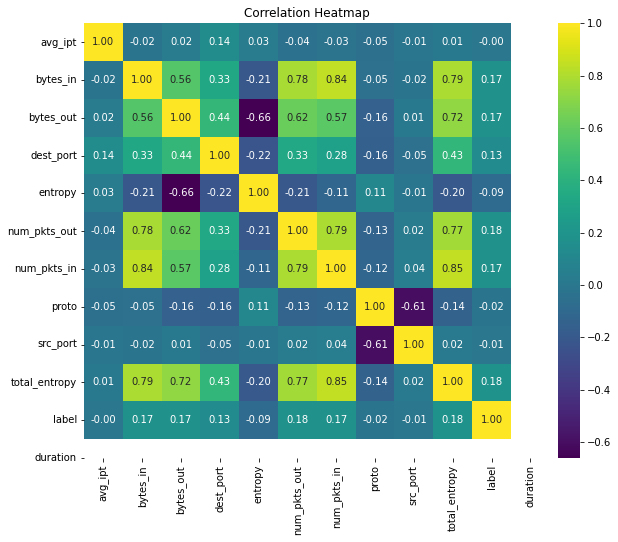

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
df_pandas = filtered_df.toPandas()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df_pandas.corr(),
            xticklabels=df_pandas.columns,
            yticklabels=df_pandas.columns,
            cmap='viridis',
            annot=True,
            fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

To align the data with the hypotheses and prepare it for machine learning modeling, we'll first define a UDF (User Defined Function) to categorize the 'avg_ipt' values based on the hypothesis. Then, we'll split the data into training and testing sets. Let's proceed with the implementation:

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def categorize_avg_ipt(avg_ipt):
    if avg_ipt < 100:
        return 'low'
    elif avg_ipt >= 100 and avg_ipt < 500:
        return 'medium'
    else:
        return 'high'

# Register the UDF
categorize_avg_ipt_udf = udf(categorize_avg_ipt, StringType())

# Apply the UDF to create a new column 'avg_ipt_category'
filtered_df = filtered_df.withColumn('avg_ipt_category', categorize_avg_ipt_udf(filtered_df['avg_ipt']))


In [0]:
filtered_df.show(truncate = False)

+------------------+--------+---------+---------+--------+------------+-----------+-----+--------+-------------+---------+---------+----------------+
|avg_ipt           |bytes_in|bytes_out|dest_port|entropy |num_pkts_out|num_pkts_in|proto|src_port|total_entropy|label    |duration |avg_ipt_category|
+------------------+--------+---------+---------+--------+------------+-----------+-----+--------+-------------+---------+---------+----------------+
|193.75            |270     |191      |445      |4.600684|6           |6          |6    |60548   |2120.9153    |malicious|1.233846 |medium          |
|5.0               |48      |48       |123      |4.99962 |1           |1          |17   |123     |479.96356    |outlier  |0.010322 |low             |
|93.25             |1443    |1176     |22       |6.803977|12          |14         |6    |30002   |17819.615    |malicious|1.155125 |low             |
|337.4             |1036    |14727    |9200     |2.421072|15          |6          |6    |39398   |38

In [0]:
# Define the ratio for splitting (e.g., 80% training, 20% testing)
train_ratio = 0.8
test_ratio = 1 - train_ratio

# Split the data into training and testing sets
train_data, test_data = filtered_df.randomSplit([train_ratio, test_ratio], seed=42)

# Show the count of training and testing data
print("Training Data Count:", train_data.count())
print("Testing Data Count:", test_data.count())


Training Data Count: 53469
Testing Data Count: 13022


In [0]:
filtered_df.show(10)

+------------------+--------+---------+---------+--------+------------+-----------+-----+--------+-------------+---------+---------+----------------+
|           avg_ipt|bytes_in|bytes_out|dest_port| entropy|num_pkts_out|num_pkts_in|proto|src_port|total_entropy|    label| duration|avg_ipt_category|
+------------------+--------+---------+---------+--------+------------+-----------+-----+--------+-------------+---------+---------+----------------+
|            193.75|     270|      191|      445|4.600684|           6|          6|    6|   60548|    2120.9153|malicious| 1.233846|          medium|
|               5.0|      48|       48|      123| 4.99962|           1|          1|   17|     123|    479.96356|  outlier| 0.010322|             low|
|             93.25|    1443|     1176|       22|6.803977|          12|         14|    6|   30002|    17819.615|malicious| 1.155125|             low|
|             337.4|    1036|    14727|     9200|2.421072|          15|          6|    6|   39398|  

In [0]:
train_data.show(10)


+-------+--------+---------+---------+--------+------------+-----------+-----+--------+-------------+---------+--------+----------------+
|avg_ipt|bytes_in|bytes_out|dest_port| entropy|num_pkts_out|num_pkts_in|proto|src_port|total_entropy|    label|duration|avg_ipt_category|
+-------+--------+---------+---------+--------+------------+-----------+-----+--------+-------------+---------+--------+----------------+
|    0.5|      19|       45|    57782|4.351061|           3|          3|    6|   42792|    278.46793|malicious|0.095111|             low|
|    0.5|      19|      164|     9477|5.265231|           4|          4|    6|   59356|    963.53723|malicious|0.093598|             low|
|    0.5|      36|       36|       22|5.777361|           2|          1|    6|   59432|       415.97|malicious|0.016293|             low|
|    0.5|      36|       36|       22|5.843401|           2|          1|    6|   30373|     420.7249|malicious|0.017598|             low|
|    0.5|      36|       36|      

In [0]:
test_df.show(10)

+-------+--------+---------+---------+-------+------------+-----------+-----+--------+-------------+---------+--------+----------------+
|avg_ipt|bytes_in|bytes_out|dest_port|entropy|num_pkts_out|num_pkts_in|proto|src_port|total_entropy|    label|duration|avg_ipt_category|
+-------+--------+---------+---------+-------+------------+-----------+-----+--------+-------------+---------+--------+----------------+
|    0.0|       0|        0|        3|    0.0|           1|          0|    6|   41794|          0.0|malicious|     0.0|             low|
|    0.0|       0|        0|       17|    0.0|           1|          0|    6|   41794|          0.0|malicious|     0.0|             low|
|    0.0|       0|        0|       22|    0.0|           1|          0|    6|   32836|          0.0|malicious|     0.0|             low|
|    0.0|       0|        0|       22|    0.0|           1|          0|    6|   44182|          0.0|malicious|     0.0|             low|
|    0.0|       0|        0|       22|   

**Adding a new column with normalized values allows us to scale the 'bytes_in' feature
to a more interpretable and consistent scale. Normalization helps in preventing
dominance of features with larger values and ensures better convergence during model training.**

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

indexer = StringIndexer(inputCol="avg_ipt_category", outputCol="avg_ipt_category_index")

label_indexer = StringIndexer(inputCol="label", outputCol="label_index")

encoder = OneHotEncoder(inputCols=["avg_ipt_category_index"],
                        outputCols=["avg_ipt_category_encoded"])

assembler = VectorAssembler(inputCols=["avg_ipt", "avg_ipt_category_encoded", "bytes_in", "bytes_out",
                                       "dest_port", "entropy", "num_pkts_out", "num_pkts_in",
                                       "proto", "src_port", "total_entropy", "duration"],
                            outputCol="features")

rf = RandomForestClassifier(labelCol="label_index", featuresCol="features", numTrees=10)

pipeline_stages = [indexer, label_indexer, encoder, assembler, rf]

pipeline = Pipeline(stages=pipeline_stages)

pipeline_model = pipeline.fit(train_data)

predictions = pipeline_model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label_index", predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8787436645676547


<Figure size 2160x1800 with 0 Axes>

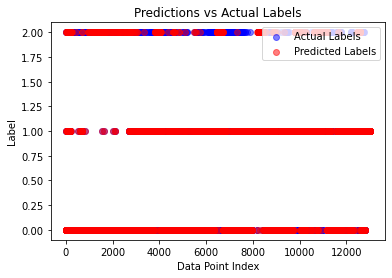

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 25))

predicted_labels = predictions.select("prediction").rdd.map(lambda row: row[0]).collect()
actual_labels = predictions.select("label_index").rdd.map(lambda row: row[0]).collect()

fig, ax = plt.subplots()



ax.scatter(range(len(actual_labels)), actual_labels, color='blue', label='Actual Labels', alpha=0.5)

ax.scatter(range(len(predicted_labels)), predicted_labels, color='red', label='Predicted Labels', alpha=0.5)

ax.set_xlabel('Data Point Index')
ax.set_ylabel('Label')
ax.set_title('Predictions vs Actual Labels')

ax.legend()

plt.show()


### Model Evaluation

The Random Forest classifier trained on the dataset achieved a test accuracy of approximately 87.87%. This indicates that the model is able to correctly classify network traffic as malicious or benign with a relatively high accuracy.

While the accuracy is a good measure of overall model performance, it's essential to consider other evaluation metrics and potentially explore further optimizations to enhance the model's effectiveness in detecting malicious network traffic.

Further analysis could involve examining additional evaluation metrics such as precision, recall, and F1-score, as well as exploring techniques for hyperparameter tuning to potentially improve the model's performance further. Additionally, investigating any misclassifications and understanding the model's behavior on different subsets of the data could provide valuable insights for refining the model.
